In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("usd_rate.xlsx")

In [3]:
df.head()

,nominal,data,curs,cdx
0,1,2018-03-01,56.3742,Доллар США
1,1,2018-03-02,56.4334,Доллар США
2,1,2018-03-03,56.6616,Доллар США
3,1,2018-03-06,57.1000,Доллар США
4,1,2018-03-07,56.5041,Доллар США


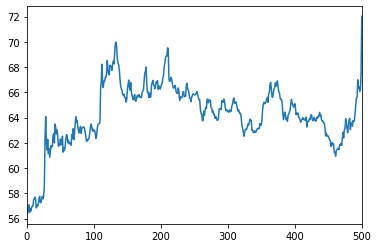

In [5]:
df.curs.plot()

In [7]:
money = df.curs

In [8]:
past = 4 * 7 # Возьмем данные за 4 недели в прошлом
future = 7 # Попытаемся предсказать курс на 7 дней в будущем

In [15]:
money.describe()

count    501.000000
mean      64.252755
std        2.472874
min       56.374200
25%       63.035900
50%       64.335200
75%       65.843000
max       72.020800
Name: curs, dtype: float64

In [13]:
start = past
end = len(money) - future

In [14]:
print(start, end)

28 494


In [16]:
new_df = []
for i in range(start, end):
    all_columns = money[(i-past):(i+future)]
    new_df.append(list(all_columns))

In [17]:
past_columns = []
for i in range(past):
    past_columns.append(f'past_{i}')

In [18]:
future_columns = []
for i in range(future):
    future_columns.append(f'future_{i}')

In [19]:
transformed_df = pd.DataFrame(new_df, columns =(past_columns + future_columns))

In [20]:
transformed_df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372,57.0188,...,57.8332,58.5714,62.3699,64.0626,62.0659,61.4311,62.2794,61.1454,61.5539,60.8583
1,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372,57.0188,57.4942,...,58.5714,62.3699,64.0626,62.0659,61.4311,62.2794,61.1454,61.5539,60.8583,61.3222
2,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372,57.0188,57.4942,57.5521,...,62.3699,64.0626,62.0659,61.4311,62.2794,61.1454,61.5539,60.8583,61.3222,61.7655
3,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372,57.0188,57.4942,57.5521,57.7033,...,64.0626,62.0659,61.4311,62.2794,61.1454,61.5539,60.8583,61.3222,61.7655,61.6644
4,56.5041,56.8011,56.6122,56.9359,56.9372,57.0188,57.4942,57.5521,57.7033,57.4954,...,62.0659,61.4311,62.2794,61.1454,61.5539,60.8583,61.3222,61.7655,61.6644,61.7494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,60.9474,61.4140,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,...,63.3085,63.7698,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274
462,61.4140,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,62.3380,...,63.7698,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274,66.4437
463,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,62.3380,62.8299,...,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274,66.4437,66.0784
464,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,62.3380,62.8299,62.3934,...,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274,66.4437,66.0784,66.1854


In [22]:
# Учебник, т.е. обучающая выборка
x = transformed_df[past_columns][:-1] # То, на основе чего мы делаем предсказание
y = transformed_df[future_columns][:-1] # То, что мы пытаемся предсказать

In [23]:
# Экзамен, т.е. "Тестовая выборка"
x_test = transformed_df[past_columns][-1:] 
y_test = transformed_df[future_columns][-1:]

In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
import matplotlib.pyplot as plt

In [16]:
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
prediction = LinReg.predict(x_test)
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

NameError: name 'prediction' is not defined

In [15]:
from sklearn.metrics import mean_absolute_error

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
KNN = KNeighborsRegressor(n_neighbors=2)

In [49]:
KNN.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [12]:
prediction = KNN.predict(x_test)
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

NameError: name 'KNN' is not defined

In [13]:
from sklearn.neural_network import MLPRegressor

In [72]:
MLP = MLPRegressor(random_state=42, alpha=0.01, max_iter=500, hidden_layer_sizes=(400, 50, 50))
MLP.fit(x, y)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(400, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
prediction = MLP.predict(x_test)
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

NameError: name 'MLP' is not defined

In [11]:
# GridSearchCV
# GridSearch - поиск по "сетке параметров"
# CV - CrossValidation

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
RFR = RandomForestRegressor()

In [5]:
param_grid = {
    "n_estimators": [50,100,500],
    'max_depth': [3, 5, 15],
}
GS = GridSearchCV(RFR, param_grid, scoring='neg_mean_absolute_error', cv=4)

In [9]:
GS.fit(x, y)

NameError: name 'x' is not defined